# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- install
    - 윈도우 유저는 Visual C++ Build Tool 을 먼저 설치
        - https://visualstudio.microsoft.com/visual-cpp-build-tools/
        - 위 경로 URL이 error 날 경우 : https://www.microsoft.com/ko-KR/download/details.aspx?id=48159
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
    - pip install fbprophet
    - 참고 : https://stackoverflow.com/questions/53178281/installing-fbprophet-python-on-windows-10
    

In [4]:
from fbprophet import Prophet

---

## 함수(def)의 기초

In [3]:
def test_def(a,b):
    return a + b

- 가장 기초적인 모양의 def 정의
- 이름(test_def)과 입력 인자(a,b)를 정해준다.
- 출력 return을 작성

$$ y = asin(2\pi ft + t_0) + b $$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
def plot_sine_wave(amp, freq, end_time, sample_time, start_time, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(start_time, end_time, sample_time)
    result = amp * np.sin(2* np.pi * freq * time + start_time) + bias
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi)" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()

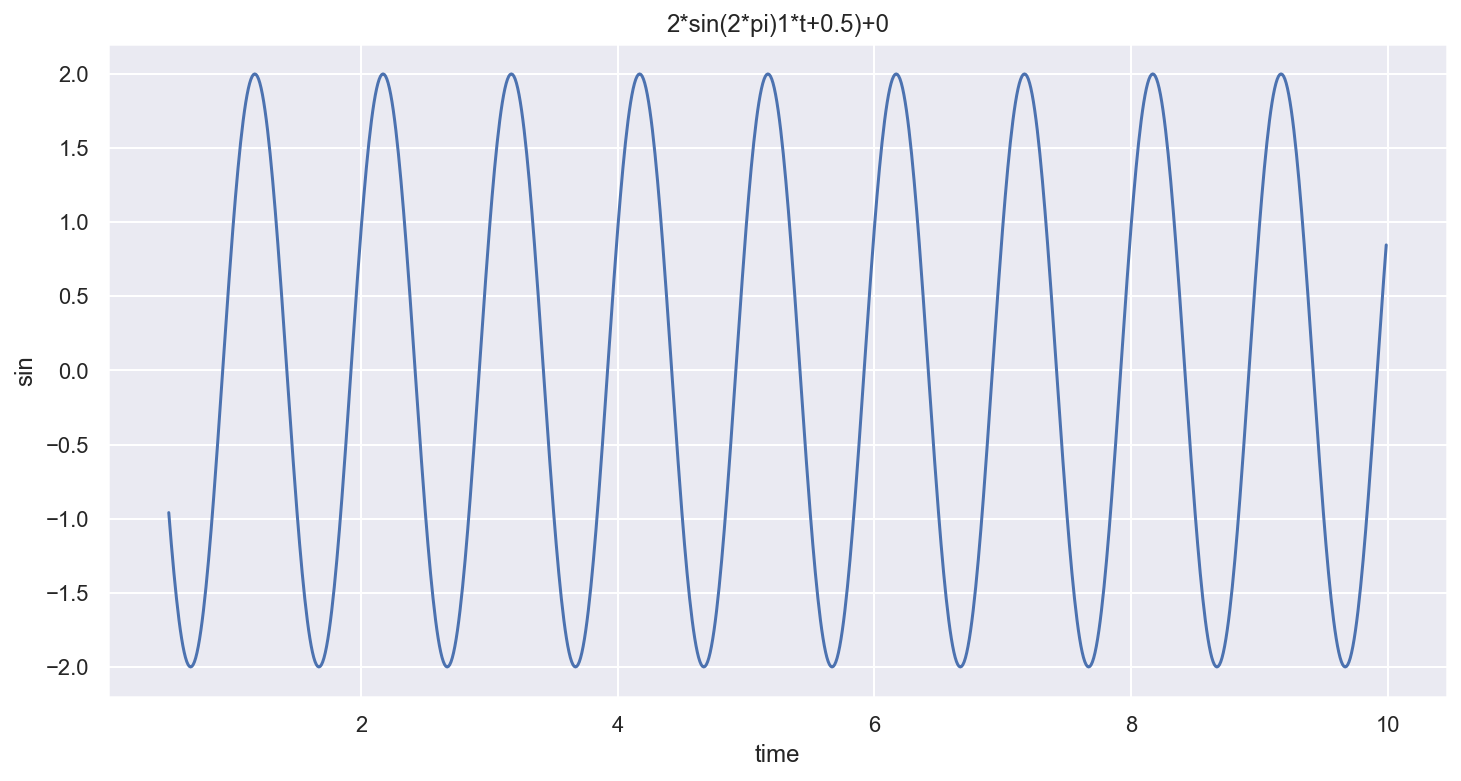

In [32]:
plot_sine_wave(2, 1, 10, 0.01, 0.5, 0)

In [33]:
def plot_sine_wave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    
    end_time = kwargs.get("end_time", 1)
    sample_time = kwargs.get("sample_time", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    start_time = kwargs.get("start_time", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(start_time, end_time, sample_time)
    result = amp * np.sin(2* np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi)" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()
    
    

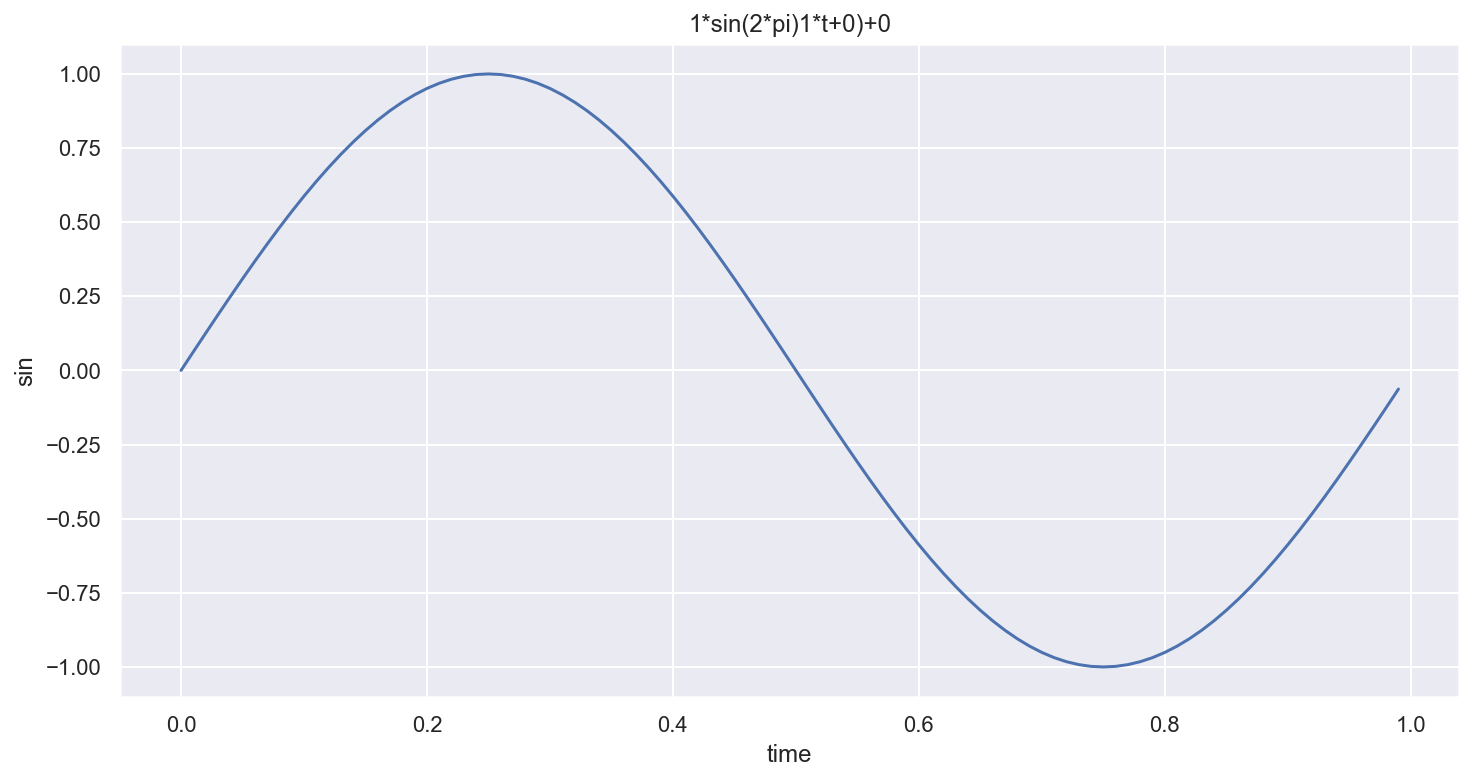

In [34]:
plot_sine_wave()

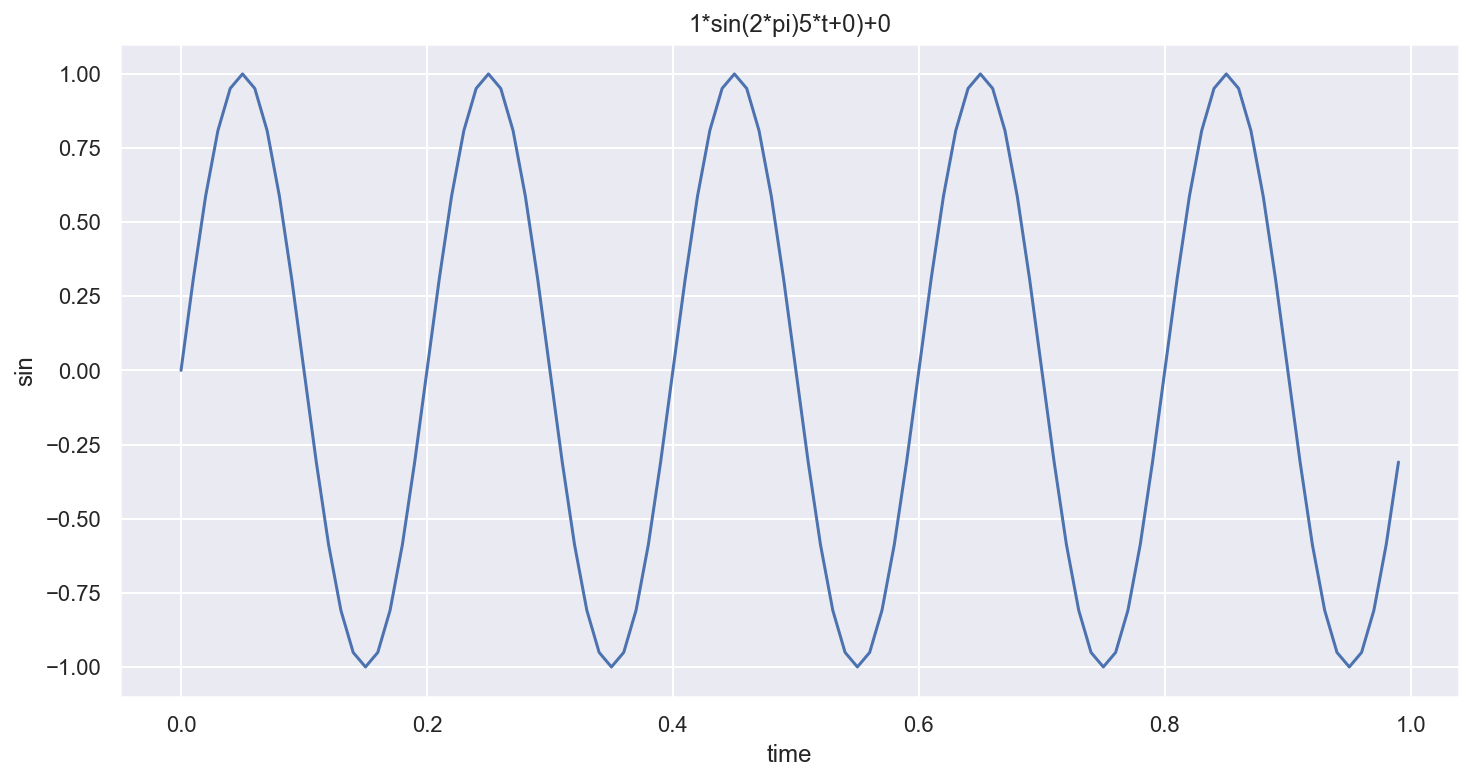

In [36]:
plot_sine_wave(freq=5)

In [40]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("This is MAC")
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    print("This is Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system.")
    
plt.rcParams["axes.unicode_minus"] = False

This is Windows


## 내가 만든 함수 import 
- draw_sin_wave.py

In [4]:
! dir

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A479-D011

 D:\공부\프로젝트\네카라쿠배 - 데이터사이언스 1기\nekalakubae_data_science_1st\ds_study\code 디렉터리

2021-10-11  오전 12:49    <DIR>          .
2021-10-11  오전 12:49    <DIR>          ..
2021-10-10  오후 10:49    <DIR>          .ipynb_checkpoints
2021-09-30  오후 10:31         1,082,859 01. Analysis Seoul CCTV.ipynb
2021-10-06  오후 10:00         2,060,943 02. Analysis Seoul Crime.ipynb
2021-09-11  오전 09:50       106,266,277 02. Analysis Seoul Crime.pdf
2021-10-06  오후 10:00         1,082,859 03. 4주차 주간 시험(quiz 03)-제출용
2021-10-01  오후 06:47           313,481 03. Naver Movie Ranking.ipynb
2021-10-04  오후 05:38           336,662 03. Web Data.ipynb
2021-10-07  오후 05:56           235,339 04. Oil Price Analysis and Green construnction.ipynb
2021-10-04  오후 05:44            73,167 04. Selenium_Basic_1.ipynb
2021-10-04  오후 11:41             1,485 04. Selenium_Basic_2-2.py
2021-10-04  오후 11:23            45,093 04. Selenium_Basic_2.ipynb
2021-10-05  오후 10:13            38,318 04. S

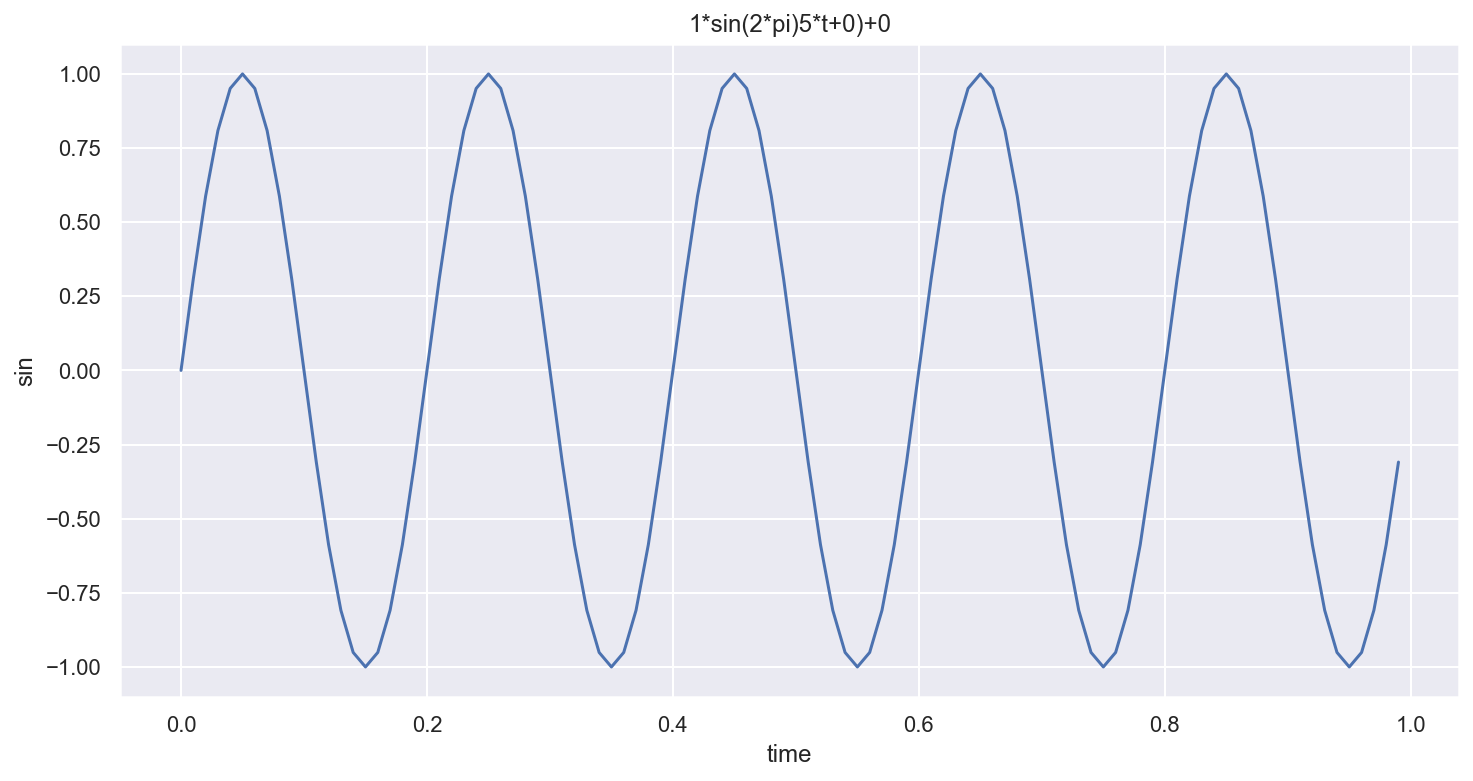

In [7]:
import plot_sin_wave as psw

psw.plot_sine_wave(freq=5)

In [40]:
%%writefile ./show_plot_sine_wave.py

import matplotlib.pyplot as plt
import numpy as np


def plot_sine_wave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    
    end_time = kwargs.get("end_time", 1)
    sample_time = kwargs.get("sample_time", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    start_time = kwargs.get("start_time", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(start_time, end_time, sample_time)
    result = amp * np.sin(2* np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi)" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias) + "한글테스트")
    plt.show()
    
if __name__ == "__main__":
    plot_sine_wave()

Overwriting ./show_plot_sine_wave.py


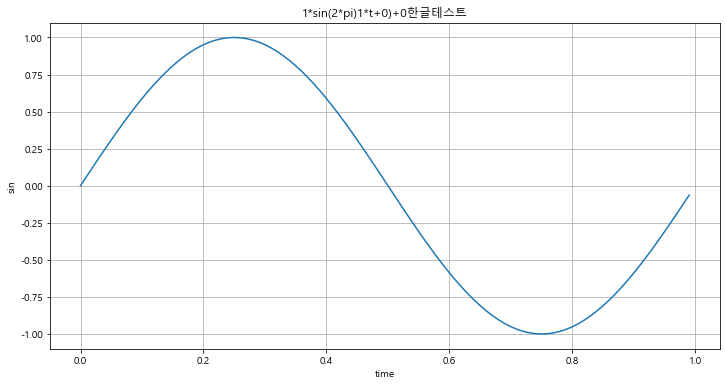

In [3]:
import show_plot_sine_wave

show_plot_sine_wave.plot_sine_wave()

In [27]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Set Hangul of Darwin")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    print("Set Hangul of Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. Error Hangul")
    
plt.rcParams["axes.unicode_minus"] = False

Writing ./set_matplotlib_hangul.py


In [2]:
import set_matplotlib_hangul

Set Hangul of Windows
